Please check the README file


Visualize the data of the dataset

Data Head:
   Unnamed: 0   Sector  Last page  \
0           5  Private          5   
1          11  Private          5   
2          14  Private          5   
3          15  Private          5   
4          16  Private          5   

  Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?  \
0                                                Yes                                                               
1                                                Yes                                                               
2                                                Yes                                                               
3                                                Yes                                                               
4                                                Yes                                                               

  I see myself as someone who is extraverted, enthusiastic:  \
0     

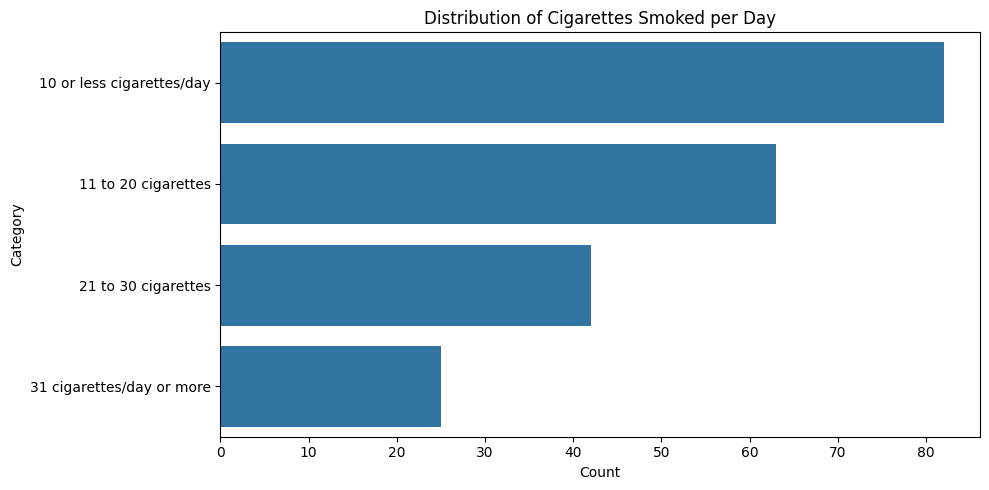


Value counts for Extroversion:
I see myself as someone who is extraverted, enthusiastic:
Agree moderately              65
Agree a little                44
Agree strongly                41
Disagree a little             27
Disagree moderately           17
Neither agree nor disagree    13
Disagree strongly              5
Name: count, dtype: int64


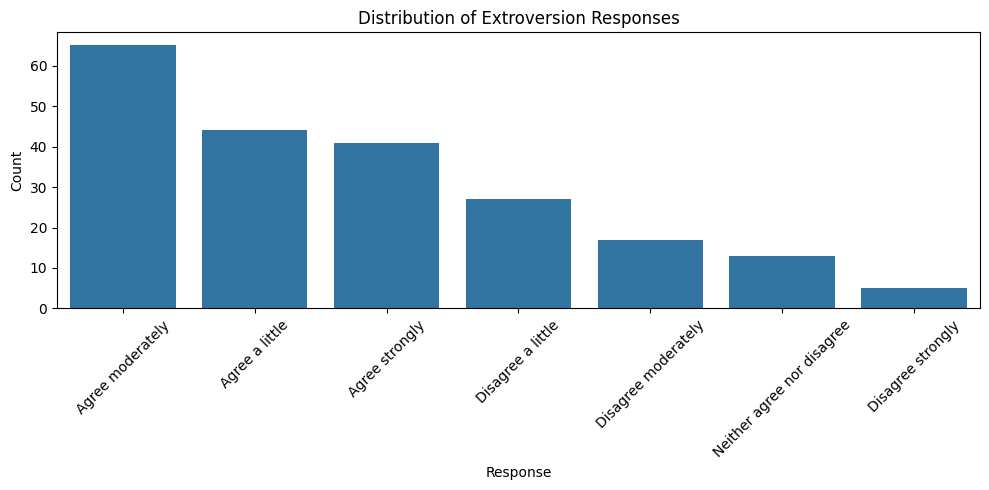


Numeric columns: Index(['Unnamed: 0', 'Last page',
       'How old were you the first time you smoked a full cigarette (not just a few puffs)?',
       'How old are you?',
       'Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?',
       'Including yourself, how many people currently live in your household?'],
      dtype='object')


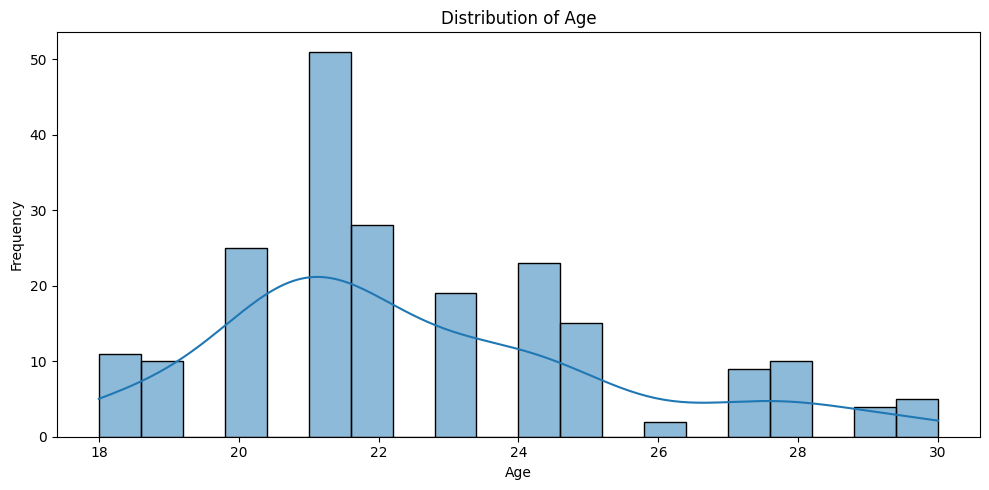

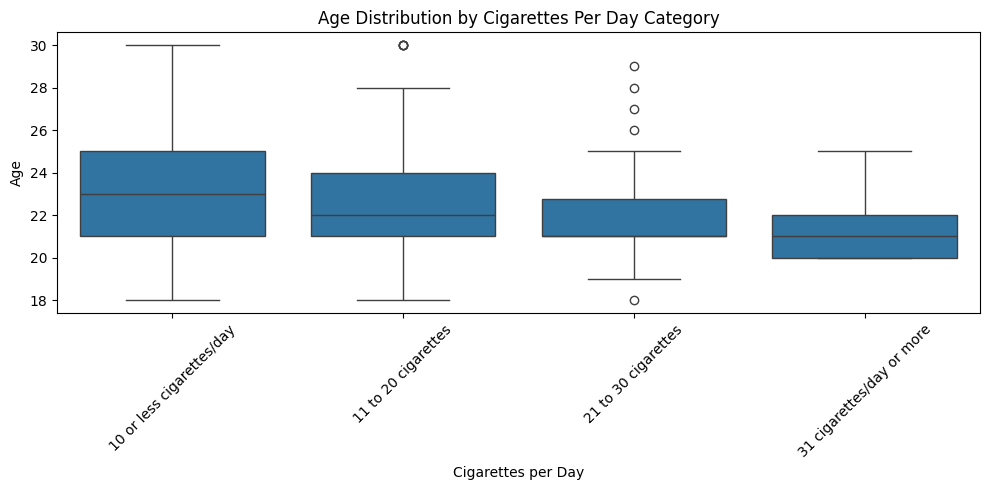

I see myself as someone who is extraverted, enthusiastic: ['Agree strongly' 'Agree moderately' 'Disagree moderately'
 'Agree a little' 'Disagree strongly' 'Disagree a little'
 'Neither agree nor disagree']
I see myself as someone who is critical, quarrelsome: ['Disagree moderately' 'Agree moderately' 'Neither agree nor disagree'
 'Agree a little' 'Disagree a little' 'Agree strongly' nan]
I see myself as someone who is dependable, self-disciplined: ['Agree strongly' 'Agree moderately' 'Agree a little'
 'Neither agree nor disagree' 'Disagree moderately' 'Disagree a little'
 'Disagree strongly']
I see myself as someone who is anxious, easily upset: ['Agree moderately' 'Agree a little' 'Disagree strongly'
 'Disagree moderately' 'Agree strongly' 'Neither agree nor disagree'
 'Disagree a little']
I see myself as someone who is open to new experiences: ['Agree strongly' 'Disagree a little' 'Agree moderately' 'Agree a little'
 'Neither agree nor disagree' 'Disagree moderately' 'Disagree strong

C:\Users\Roni\AppData\Local\Temp\ipykernel_17000\2235326849.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_personality = data[personality_cols].replace(response_map)


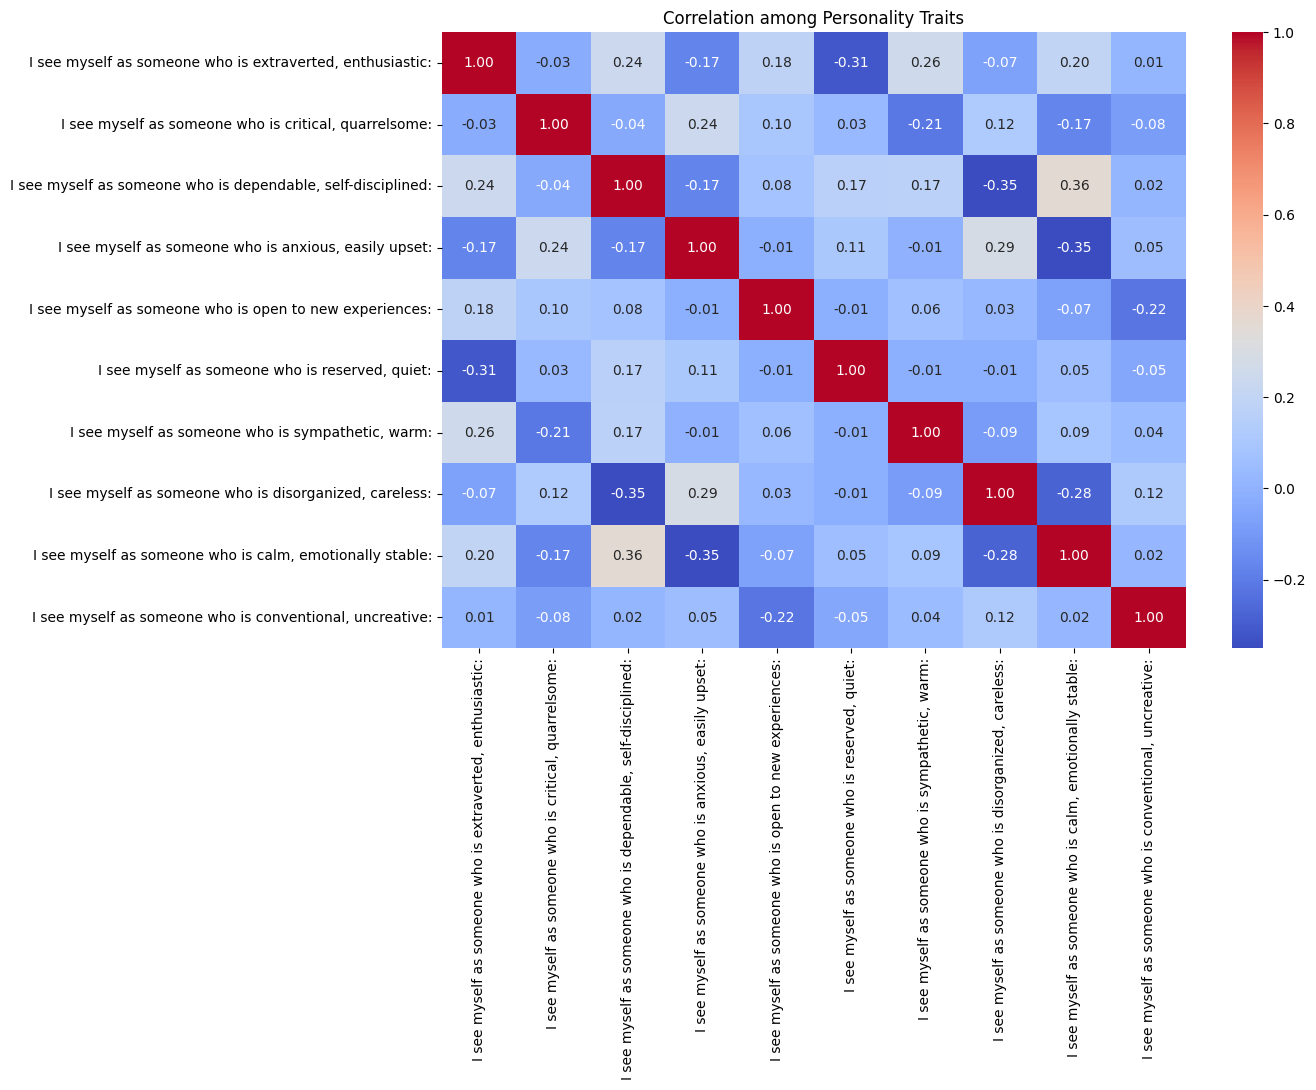

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure the file path is correct)
file_path = "2024_PersonalityTraits_SurveyData.xls"  # Replace with your file path
data = pd.read_excel(file_path)

# Display basic info about the dataset
print("Data Head:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Description (Numeric Columns):")
print(data.describe())

# Check which columns are available
print("\nColumns in the dataset:")
print(data.columns)

# Explore the distribution of daily cigarette consumption
col_cig_day = "How many cigarettes do you smoke each day?"   
if col_cig_day in data.columns:
    print("\nValue counts for daily cigarette consumption:")
    print(data[col_cig_day].value_counts(dropna=False))

    # Plot the distribution of daily cigarette counts
    plt.figure(figsize=(10,5))
    sns.countplot(y=col_cig_day, data=data, order=data[col_cig_day].value_counts().index)
    plt.title("Distribution of Cigarettes Smoked per Day")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.show()

# Similarly, we can inspect personality trait columns
# Let's say we want to look at one personality trait column such as:
# "I see myself as someone who is extraverted, enthusiastic:"
col_extroversion = "I see myself as someone who is extraverted, enthusiastic:"
if col_extroversion in data.columns:
    print("\nValue counts for Extroversion:")
    print(data[col_extroversion].value_counts(dropna=False))

    # Plot the distribution of responses to the extroversion trait
    plt.figure(figsize=(10,5))
    sns.countplot(x=col_extroversion, data=data, order=data[col_extroversion].value_counts().index)
    plt.title("Distribution of Extroversion Responses")
    plt.xlabel("Response")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Explore relationships between numeric features and cigarette consumption
# First, identify numeric columns
numeric_cols = data.select_dtypes(include=["int64","float64"]).columns
print("\nNumeric columns:", numeric_cols)

# If "How old are you?" is a numeric column, we can plot a distribution:
col_age = "How old are you?"
if col_age in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data[col_age], bins=20, kde=True)
    plt.title("Distribution of Age")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Relationship between age and cigarettes per day (if the latter is numeric or can be encoded)
if col_cig_day in data.columns and col_age in numeric_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col_cig_day, y=col_age, data=data)
    plt.title("Age Distribution by Cigarettes Per Day Category")
    plt.xlabel("Cigarettes per Day")
    plt.ylabel("Age")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Check if any personality columns are numeric:
# Identify personality columns
personality_cols = [c for c in data.columns if "I see myself as someone who" in c]

# Check unique responses
for col in personality_cols:
    print(col, data[col].unique())

# Update response_map based on actual unique responses found in your dataset
response_map = {
    "Agree strongly": 3,
    "Agree moderately": 2,
    "Agree a little": 1,
    "Neither agree nor disagree": 0,
    "Disagree moderately": -1,
    "Disagree a little": -2,
    "Disagree strongly": -3
}

# Replace textual responses with numeric codes
data_personality = data[personality_cols].replace(response_map)

# Ensure all data is now numeric
print(data_personality.head())

# Now compute correlation
corr = data_personality.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation among Personality Traits")
plt.show()


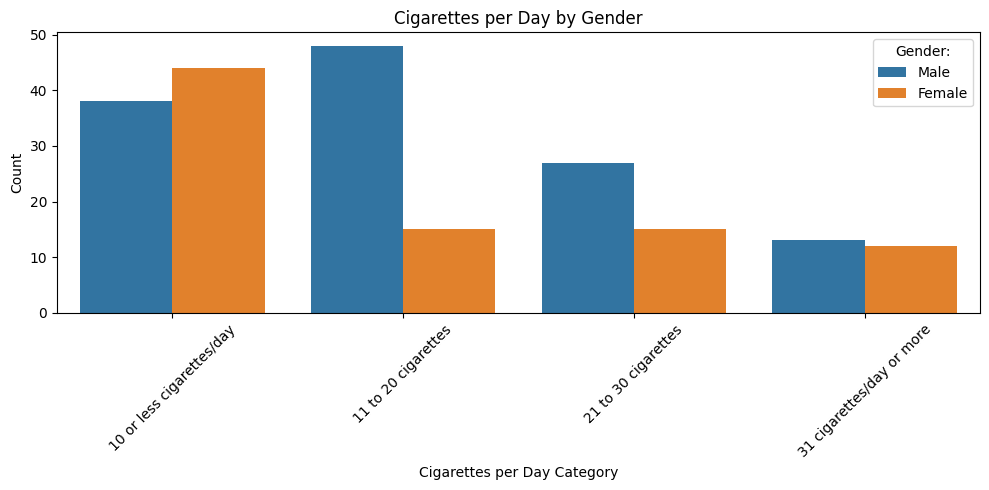

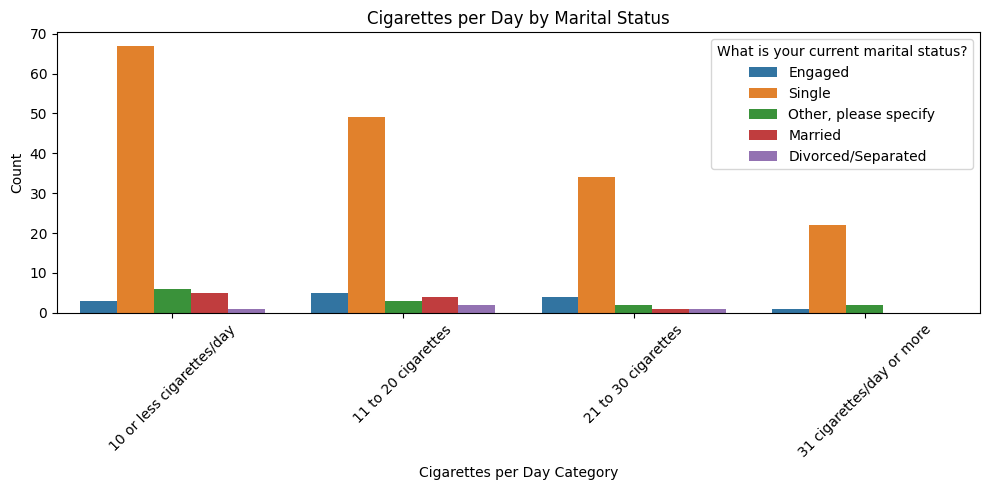

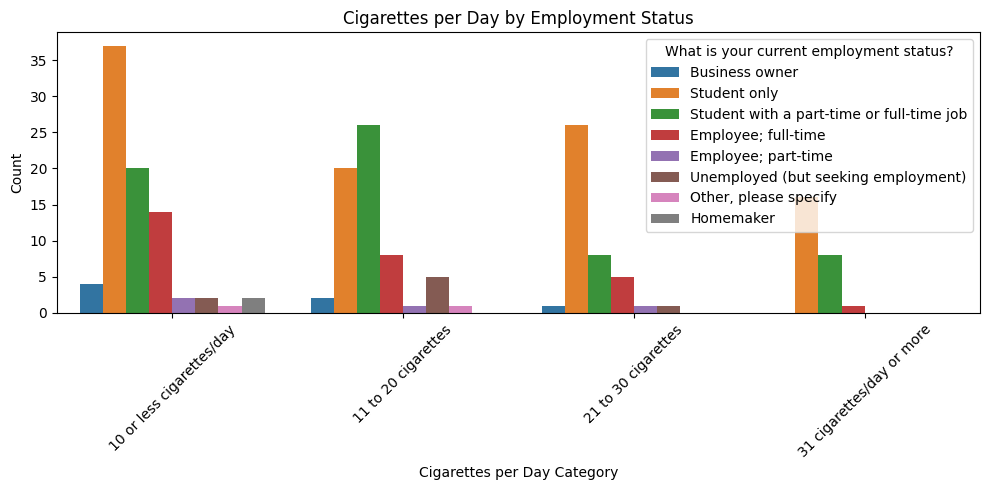

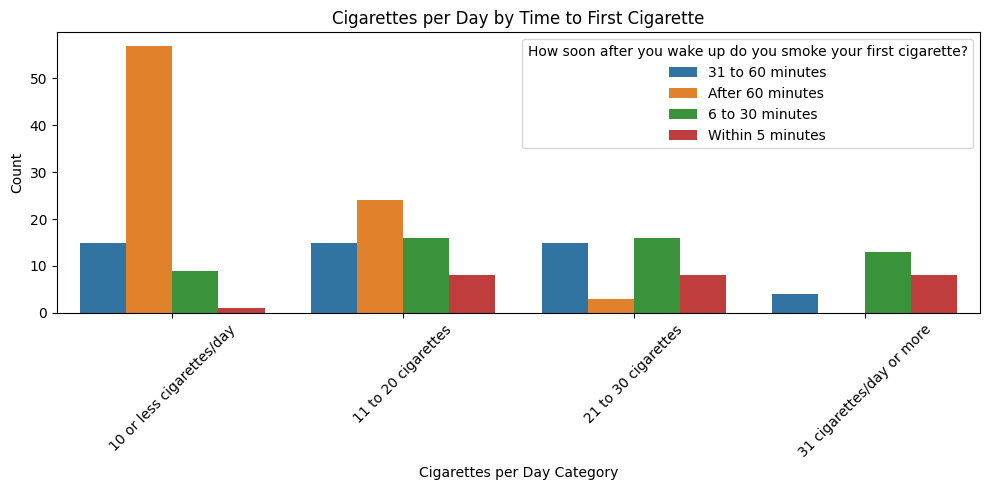

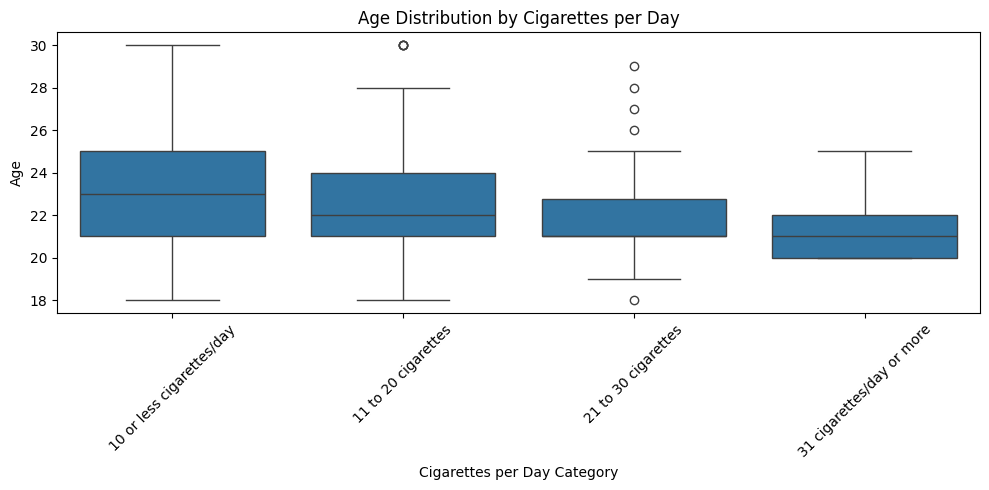

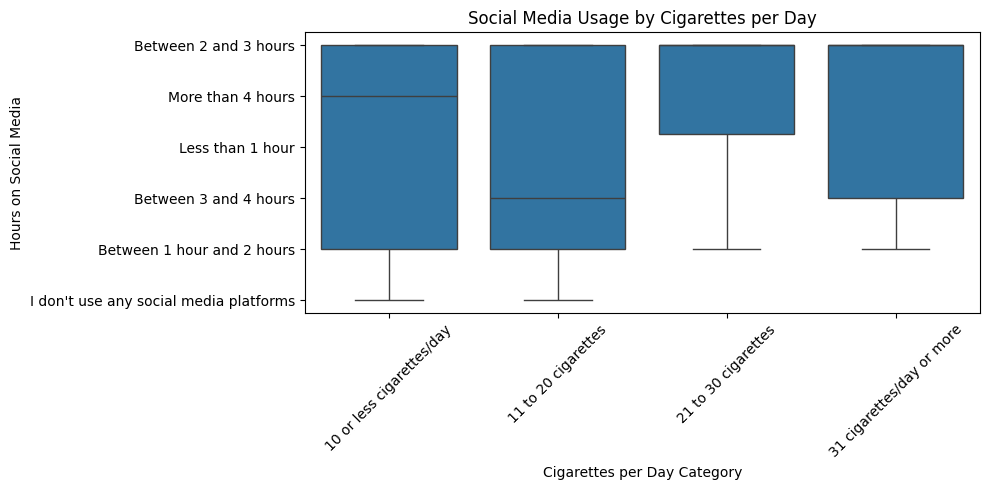

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# We'll assume these are the column names in your dataset:
col_cig_day = "How many cigarettes do you smoke each day?"
col_gender = "Gender:"
col_age = "How old are you?"
col_employment = "What is your current employment status?"
col_marital = "What is your current marital status?"
col_first_cig = "How soon after you wake up do you smoke your first cigarette?"
col_social_media = "On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?"

# 1. Gender vs. Cigarettes Per Day
plt.figure(figsize=(10,5))
sns.countplot(x=col_cig_day, hue=col_gender, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Cigarettes per Day by Gender")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Marital Status vs. Cigarettes Per Day
plt.figure(figsize=(10,5))
sns.countplot(x=col_cig_day, hue=col_marital, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Cigarettes per Day by Marital Status")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Employment Status vs. Cigarettes Per Day
plt.figure(figsize=(10,5))
sns.countplot(x=col_cig_day, hue=col_employment, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Cigarettes per Day by Employment Status")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. First Cigarette After Waking vs. Cigarettes Per Day
# If 'col_first_cig' is categorical, similar to the above:
plt.figure(figsize=(10,5))
sns.countplot(x=col_cig_day, hue=col_first_cig, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Cigarettes per Day by Time to First Cigarette")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Age vs. Cigarettes Per Day
# For age (a numeric variable), we can use a boxplot to see age distribution per cigarette category:
plt.figure(figsize=(10,5))
sns.boxplot(x=col_cig_day, y=col_age, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Age Distribution by Cigarettes per Day")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Social Media Hours vs. Cigarettes Per Day
# If social media hours is numeric, a boxplot can also be used:
plt.figure(figsize=(10,5))
sns.boxplot(x=col_cig_day, y=col_social_media, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Social Media Usage by Cigarettes per Day")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Hours on Social Media")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


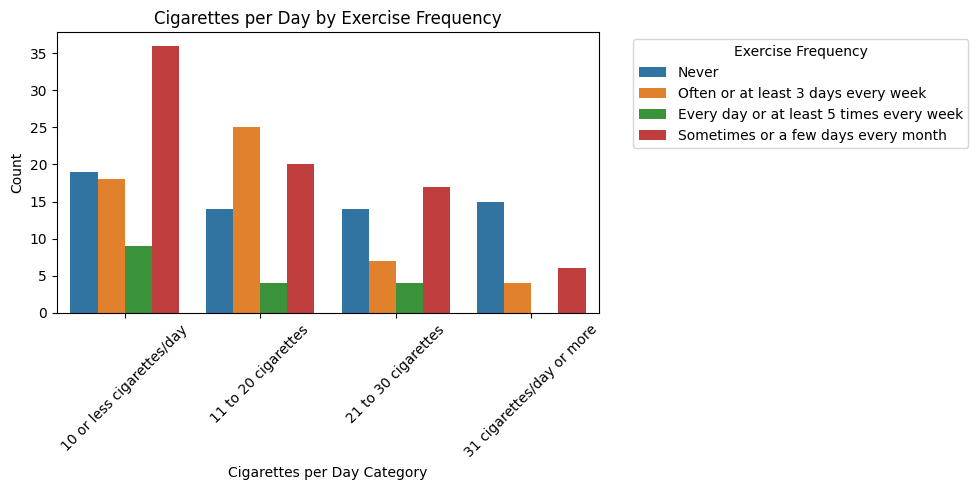

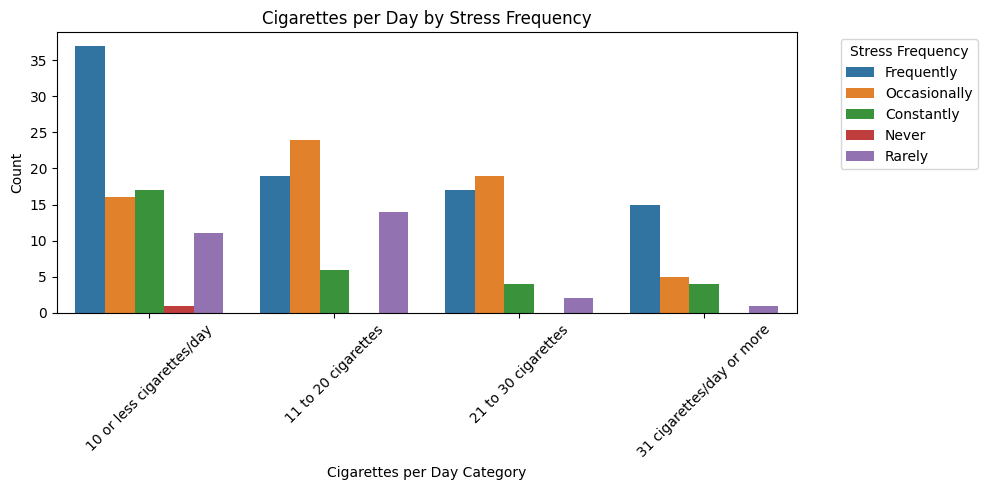

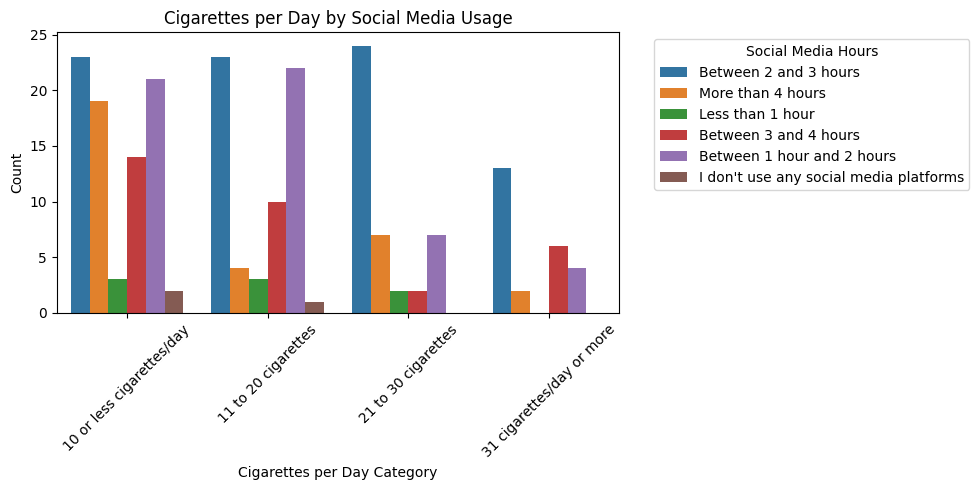

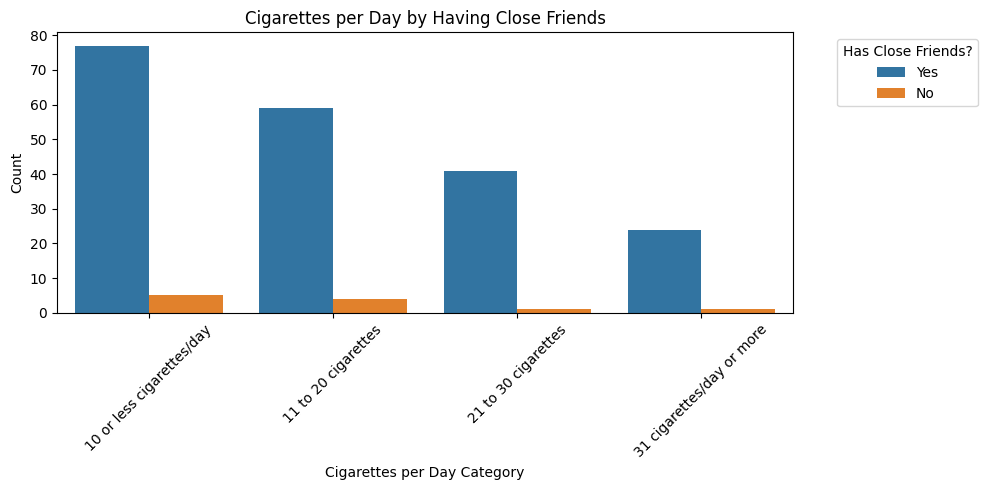

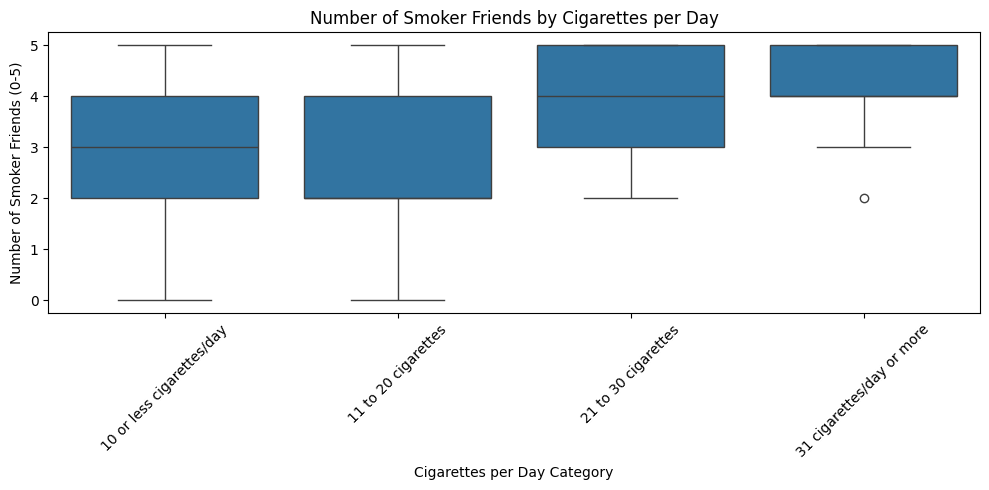

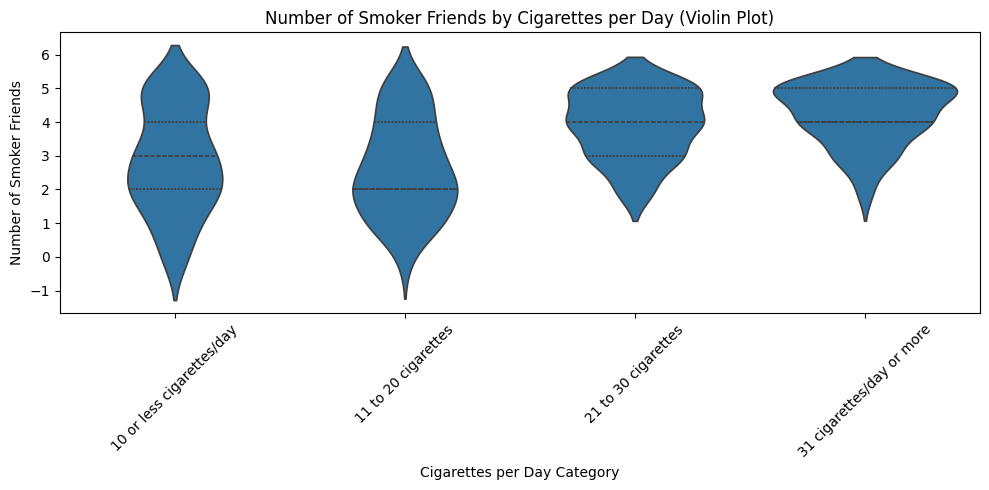

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

col_cig_day = "How many cigarettes do you smoke each day?"
col_exercise = "How often do you exercise?"
col_stress = "How often do you feel stressed?"
col_social_media = "On average, how many hours per day do you spend on social media for entertainment and social interaction (Facebook, Instagram, YouTube, etc...)?"
col_close_friends = "Do you have close friends?"  
col_num_smoker_friends = "Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?"

# 1. Exercise vs Cigarettes per Day (Both Categorical)
plt.figure(figsize=(10,5))
sns.countplot(x=col_cig_day, hue=col_exercise, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Cigarettes per Day by Exercise Frequency")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Exercise Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Stress vs Cigarettes per Day (Both Categorical)
plt.figure(figsize=(10,5))
sns.countplot(x=col_cig_day, hue=col_stress, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Cigarettes per Day by Stress Frequency")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Stress Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Social Media Hours vs Cigarettes per Day (Both Categorical)
# Treat the social media variable as categorical and plot similarly:
plt.figure(figsize=(10,5))
sns.countplot(x=col_cig_day, hue=col_social_media, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Cigarettes per Day by Social Media Usage")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Social Media Hours", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. Close Friends vs Cigarettes per Day (If This is Yes/No, it's Categorical)
plt.figure(figsize=(10,5))
sns.countplot(x=col_cig_day, hue=col_close_friends, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Cigarettes per Day by Having Close Friends")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Has Close Friends?", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5. Number of Smoker Friends vs Cigarettes per Day
# If "Of the five closest friends...how many are smokers?" is numeric (0-5), we can treat it as numeric.
# A boxplot or violinplot can show distribution of smoker friends counts across cigarette categories:
plt.figure(figsize=(10,5))
sns.boxplot(x=col_cig_day, y=col_num_smoker_friends, data=data, order=data[col_cig_day].value_counts().index)
plt.title("Number of Smoker Friends by Cigarettes per Day")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Number of Smoker Friends (0-5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# If you prefer a violin plot:
plt.figure(figsize=(10,5))
sns.violinplot(x=col_cig_day, y=col_num_smoker_friends, data=data, order=data[col_cig_day].value_counts().index, inner="quartile")
plt.title("Number of Smoker Friends by Cigarettes per Day (Violin Plot)")
plt.xlabel("Cigarettes per Day Category")
plt.ylabel("Number of Smoker Friends")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


How soon after you wake up do you smoke your first cigarette?
After 60 minutes    84
6 to 30 minutes     54
31 to 60 minutes    49
Within 5 minutes    25
Name: count, dtype: int64
How many cigarettes do you smoke each day?
10 or less cigarettes/day    82
11 to 20 cigarettes          63
21 to 30 cigarettes          42
31 cigarettes/day or more    25
Name: count, dtype: int64
NicotineDependence
1    140
0     72
Name: count, dtype: int64
Confusion Matrix:
[[ 6  8]
 [ 7 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.43      0.44        14
           1       0.73      0.76      0.75        29

    accuracy                           0.65        43
   macro avg       0.60      0.59      0.60        43
weighted avg       0.64      0.65      0.65        43

Education_Encoded                                               0.119591
I see myself as someone who is reserved, quiet:                 0.109835
I see myself as someone wh

C:\Users\Roni\AppData\Local\Temp\ipykernel_17000\1110306033.py:85: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[personality_cols] = data[personality_cols].replace(response_map)


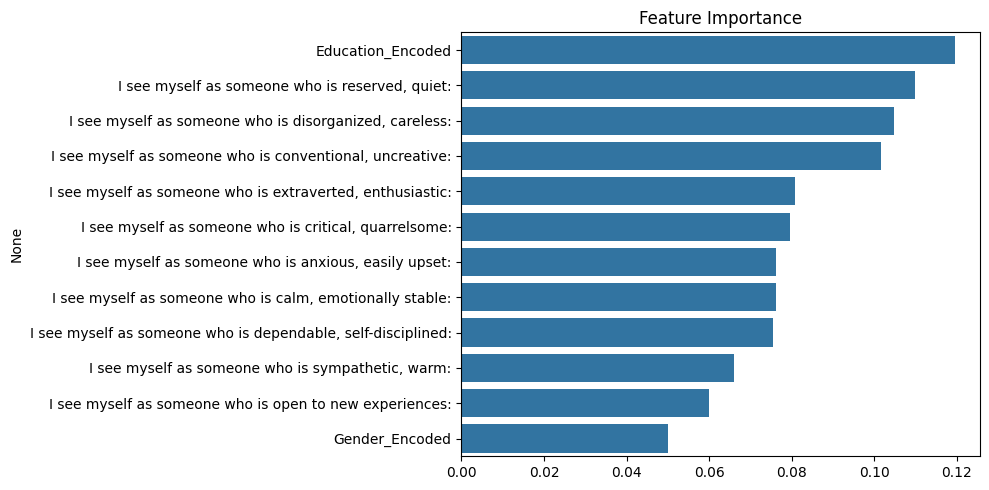

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data
file_path = "2024_PersonalityTraits_SurveyData.xls"
data = pd.read_excel(file_path)

# 2. Inspect the relevant columns for nicotine dependence
# Check unique values for "How soon after you wake up do you smoke your first cigarette?"
print(data["How soon after you wake up do you smoke your first cigarette?"].value_counts())

# Check unique values for "How many cigarettes do you smoke each day?"
print(data["How many cigarettes do you smoke each day?"].value_counts())

# For the sake of example, let's define numerical categories:
# Let's create a helper function to categorize dependence.
def categorize_dependence(row):
    # Extracting relevant fields
    wake_up = row["How soon after you wake up do you smoke your first cigarette?"]
    cigs_per_day = row["How many cigarettes do you smoke each day?"]
    
    # Convert textual categories to numeric thresholds
    # E.g. "Within 5 minutes", "6 to 30 minutes", "After 60 minutes", "31 to 60 minutes"
    # We'll define: High dependence if they smoke first cig within 30 min or smoke >10 cigs/day
    # Map time categories to a numeric scale in minutes:
    time_map = {
        "Within 5 minutes": 5,
        "6 to 30 minutes": 15,  # midpoint in 6 to 30
        "6 to 30 minutes ": 15, # handle extra spaces if any
        "31 to 60 minutes": 45,
        "After 60 minutes": 90
    }
    
    # Map daily cigarettes to a numeric midpoint:
    # Example: "10 or less cigarettes/day" -> 10, "11 to 20 cigarettes" -> 15, etc.
    cpd_map = {
        "10 or less cigarettes/day": 10,
        "11 to 20 cigarettes": 15,
        "21 to 30 cigarettes": 25,
        "31 cigarettes/day or more": 35
    }
    
    # Get numeric values from maps if possible
    wake_up_time = time_map.get(wake_up, np.nan)
    cpd = cpd_map.get(cigs_per_day, np.nan)
    
    if pd.isna(wake_up_time) or pd.isna(cpd):
        # If we can't decode, return None or a default
        return np.nan
    
    # Define High dependence criteria:
    # e.g., wake_up_time <= 30 or cpd > 10
    if (wake_up_time <= 30) or (cpd > 10):
        return 1  # High dependence
    else:
        return 0  # Low dependence

# Apply the function
data["NicotineDependence"] = data.apply(categorize_dependence, axis=1)

# Check how many are high vs low
print(data["NicotineDependence"].value_counts(dropna=False))

# Drop rows with NaN in target if any
data = data.dropna(subset=["NicotineDependence"])

# 3. Select Features
# For demonstration, let's use personality traits and some demographic factors as features.
# Personality traits (already converted? If not, do it now)
response_map = {
    "Agree strongly": 2,
    "Agree moderately": 1,
    "Agree a little": 1,
    "Neither agree nor disagree": 0,
    "Disagree moderately": -1,
    "Disagree a little": -1,
    "Disagree strongly": -2
}
personality_cols = [c for c in data.columns if "I see myself as someone who" in c]
data[personality_cols] = data[personality_cols].replace(response_map)

# Let's also pick a few demographic features, e.g. Age, Gender, Education, etc.
# For categorical features like Gender, encode them:
if "Gender:" in data.columns:
    data["Gender_Encoded"] = data["Gender:"].map({"Male": 1, "Female": 0})
else:
    # If your column name differs, adjust accordingly.
    pass

# Similarly encode education if needed
if "What is the highest level of education you have attained?" in data.columns:
    # Simple ordinal encoding (adjust as needed):
    education_map = {
        "Less than high school": 0,
        "High school degree or equivalent (e.g. GED)": 1,
        "Incomplete bachelor's degree": 2,
        "Bachelor's degree (BA/BS)": 3,
        "Graduate degree (MA/MS)": 4,
        "Post-graduate degree (PhD, MD, or other)": 5
    }
    data["Education_Encoded"] = data["What is the highest level of education you have attained?"].map(education_map)

# Filter numeric columns only for modeling
feature_cols = personality_cols + ["Gender_Encoded", "Education_Encoded"]
X = data[feature_cols].fillna(0)  # Fill missing with 0 or use a better imputation
y = data["NicotineDependence"].astype(int)

# 4. Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train a simple model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = clf.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Feature Importance
importances = clf.feature_importances_
feature_importance = pd.Series(importances, index=feature_cols).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
